In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

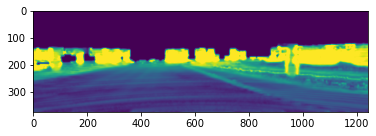

In [94]:
img_ADI = plt.imread('/home/sourish-wicon-lab/Documents/WSN/ADI-testing/ADI/umm_000001.png')
img_only = plt.imread('/home/sourish-wicon-lab/Documents/WSN/data_road/training/image_2/umm_000001.png')
img_only = img_only[:,:,0]
plt.imshow(img_ADI)

In [25]:
img_only.shape

(375, 1242)

In [115]:
def img_ADI_det(img_ADI):
    _,thresh = cv2.threshold(img_ADI, np.mean(img_ADI)-0.009, 255, cv2.THRESH_BINARY_INV)
    #
    #img_not = cv2.bitwise_not(thresh)
    #fin_img = cv2.Sobel(src=img_not, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=9) 
    #fin_img = cv2.bitwise_not(fin_img)
    fin_img = thresh
    return fin_img

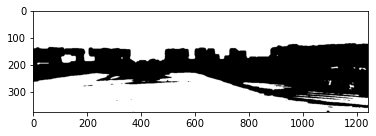

In [116]:
img_op = img_ADI_det(img_ADI)
img_op2 = img_ADI_det(img_only)
img_plard = plt.imread('/home/sourish-wicon-lab/Documents/WSN/PLARD/outputs/results/umm_road_000001.png')
plt.imshow(img_op,'gray')

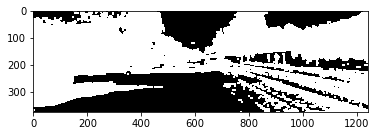

In [60]:
plt.imshow(img_op2,'gray')

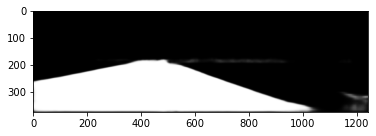

In [61]:
plt.imshow(img_plard,'gray')

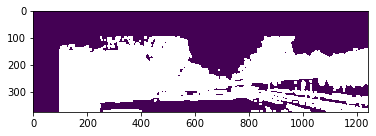

In [49]:
# Taking a matrix of size 5 as the kernel

kernel = np.ones((21, 21), np.uint8)
img_dilation = cv2.dilate(img_op2, kernel, iterations=10)
plt.imshow(img_dilation)

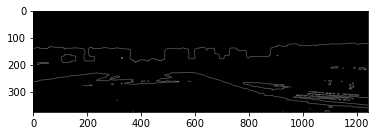

In [120]:
#kernel_size = 5
#blur = cv2.GaussianBlur(img_ADI, (kernel_size, kernel_size), 0)
slice1Copy = np.uint8(img_op)
low_t = 50
high_t = 200
edges = cv2.Canny(slice1Copy, low_t, high_t)

plt.imshow(edges,'gray')


In [126]:
rho = 3
theta = np.pi / 180
threshold = 15
min_line_len = 150
max_line_gap = 60
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

In [139]:
lines

array([[[ 263,  248,  453,  268]],

       [[ 966,  319, 1172,  330]],

       [[1088,  336, 1239,  349]],

       [[1022,  299, 1208,  312]],

       [[  80,  250,  235,  231]],

       [[1011,  314, 1187,  324]],

       [[1015,  131, 1171,  121]],

       [[ 146,  139,  317,  139]],

       [[  31,  141,  321,  141]],

       [[ 599,  230,  857,  308]],

       [[ 408,  260,  584,  263]],

       [[1017,  341, 1227,  359]],

       [[1031,  300, 1207,  315]],

       [[ 413,  270,  569,  229]],

       [[ 599,  147,  749,  139]],

       [[ 576,  150,  753,  141]],

       [[1070,  333, 1241,  348]],

       [[ 599,  148,  751,  140]]], dtype=int32)

In [140]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    if (y1 > 130 or y2 > 130): #Filter out the lines in the top of the image
        cv2.line(img_op, (x1, y1), (x2, y2), (255, 0, 0), 3)

In [141]:
line

array([[599, 148, 751, 140]], dtype=int32)

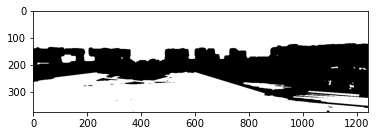

In [136]:
plt.imshow(img_op,'gray')

In [117]:
print(np.mean(img_op),np.max(img_op),np.min(img_op))

167.46729 255.0 0.0


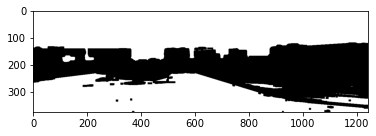

In [164]:
kernel = 1/13**2*np.ones((7,7))
#er = cv2.dilate(img_op,kernel)
er = cv2.erode(img_op,kernel)
plt.imshow(er,'gray')
kernel = 1/11**2*np.ones((11,11))
er = cv2.erode(img_op,kernel)

